In [1]:
import pandas as pd

# load the dataset
df = pd.read_csv("/content/drive/MyDrive/Telco Customer Churn.csv")

# check the first rows
df.head()




,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# **Exploratory Data Analysis (EDA)**

### **Churn Distribution**

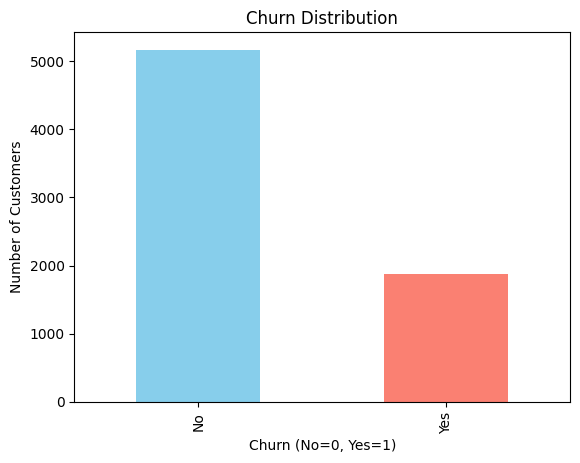

Churn
No     73.463013
Yes    26.536987
Name: proportion, dtype: float64


In [2]:
import matplotlib.pyplot as plt

# Count churn distribution
df['Churn'].value_counts().plot(kind='bar', color=['skyblue','salmon'])
plt.title("Churn Distribution")
plt.xlabel("Churn (No=0, Yes=1)")
plt.ylabel("Number of Customers")
plt.show()

print(df['Churn'].value_counts(normalize=True)*100)  # percentage

This shows how many customers churned vs stayed. Usually, churn is about ~26%.

Why it matters:

* It shows class imbalance (the model will have fewer churn cases to learn from).

* Tells us to be careful when evaluating models (accuracy alone is misleading).


In [3]:
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


### **Churn vs Tenure**

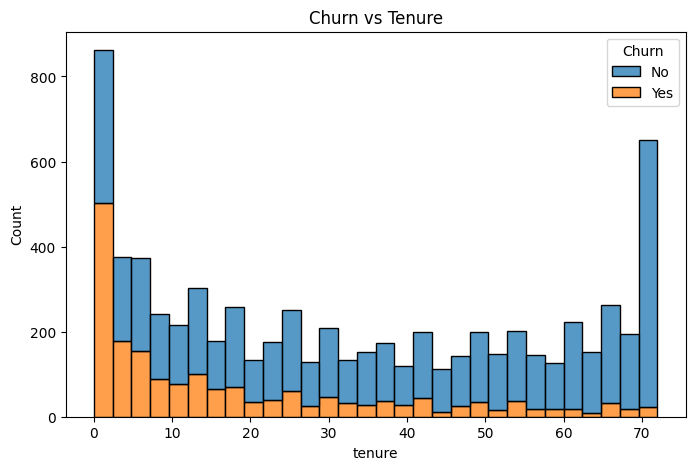

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
sns.histplot(data=df, x='tenure', hue='Churn', multiple='stack', bins=30)
plt.title("Churn vs Tenure")
plt.show()

What we are looking at:

How long customers stay (in months) and if tenure length affects churn.

Expected outcome:

* Customers with short tenure (new customers) tend to churn more.

* Customers who stay longer (e.g., 3–5 years) usually remain loyal and churn less.

Why it matters:

* Helps businesses understand that early retention is critical.

* They can focus on keeping customers engaged during the first year.

### **Churn vs Contract Type**

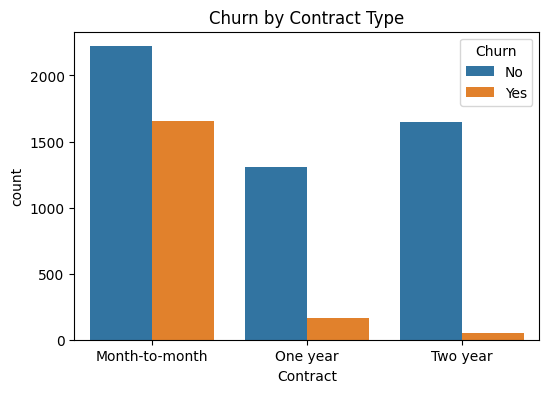

In [5]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Contract', hue='Churn')
plt.title("Churn by Contract Type")
plt.show()

What we are looking at:

The relationship between the type of contract a customer has (Month-to-Month, One Year, Two Year) and their churn behavior.

Expected outcome:

* Month-to-Month contracts usually have the highest churn rate.

* One-Year contracts have a lower churn rate.

* Two-Year contracts have the lowest churn rate (customers are more “locked in”).

Why it matters:

* Contract type is a strong predictor of churn.

* Customers on flexible, short-term contracts can leave more easily, while long-term contracts reduce churn.

* Businesses can use this insight to promote longer-term contracts with discounts or benefits, making customers less likely to churn.

### **Churn vs Payment Method**

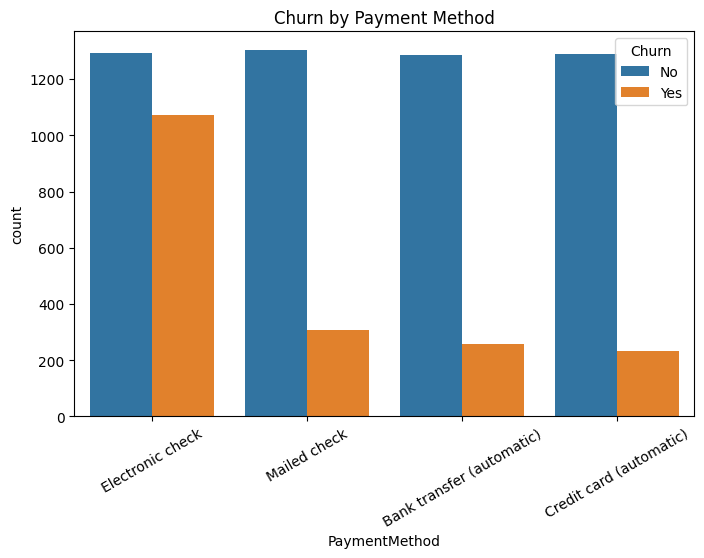

In [6]:
plt.figure(figsize=(8,5))
sns.countplot(data=df, x='PaymentMethod', hue='Churn')
plt.title("Churn by Payment Method")
plt.xticks(rotation=30)
plt.show()

What we are looking at:

Whether the type of payment (e.g., electronic check, credit card, bank transfer) influences churn.

Expected outcome:

* Customers paying with electronic check usually have higher churn.

* Customers on automatic payments (credit card, bank transfer) tend to churn less.

Why it matters:

* Suggests that billing method can predict churn.

* Businesses might encourage customers to move to automatic payments.

### **Correlation Heatmap**

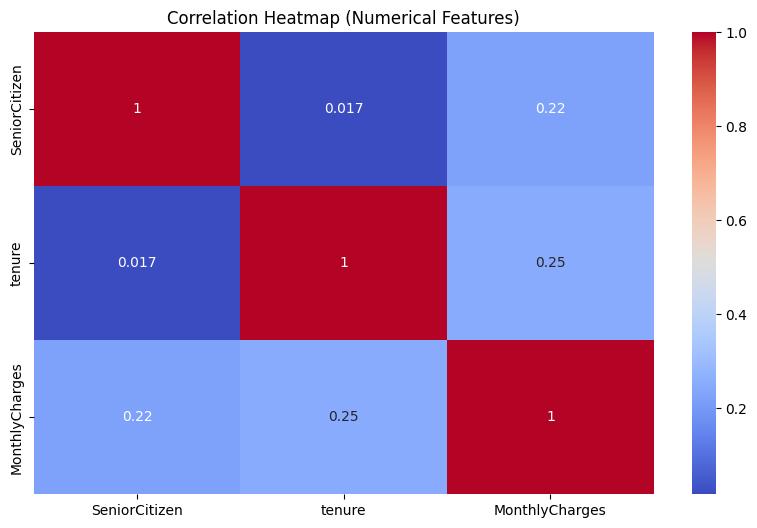

In [7]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap (Numerical Features)")
plt.show()

This highlights which numeric features (like MonthlyCharges, Tenure, TotalCharges) are linked to churn.

What we are looking at:

* The relationship between numerical features like tenure, MonthlyCharges, TotalCharges and churn.

* Correlation shows how strongly variables move together (from -1 to +1).


Expected outcome:

* Negative correlation between tenure and churn (longer tenure = less churn).

* Positive correlation between MonthlyCharges and churn (higher bills = more likely to churn).

* TotalCharges is usually correlated with tenure (longer customers have paid more).


Why it matters:

* Identifies strong predictors for the model.

* Helps decide which features to focus on when building machine learning models.

### **Overall Observation:**

*   More churn in Month-to-Month contracts.
*   More churn in customers paying by Electronic Check.
*   Short tenure customers have higher churn.
*   Higher MonthlyCharges may also be linked to churn.


# **Data Preparation**

### **Check overall structure**

In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


### **Check for missing values**

In [10]:
print(df.isnull().sum())

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


### **Drop Customer ID**

In [11]:
# Drop customerID (non-predictive)
df.drop("customerID", axis=1, inplace=True)
print("customerID" in df.columns)

False


### **Check for Duplicates**

In [12]:
# Check for duplicate rows in the dataset
duplicates = df.duplicated().sum()
print("Number of duplicate rows:", duplicates)


Number of duplicate rows: 22


In [13]:
print("Duplicate rows:", df.duplicated().sum())
df.drop_duplicates(inplace=True)
print("Duplicates after cleaning:", df.duplicated().sum())

Duplicate rows: 22
Duplicates after cleaning: 0


### **Encoding the Target Variable**

In [14]:
df["Churn"] = df["Churn"].map({"Yes": 1, "No": 0})
print(df["Churn"].unique())

[0 1]


### **Final Cleaning**

In [15]:
import numpy as np
import pandas as pd

# Clean TotalCharges – replace spaces with NaN, then convert to float
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)
df['TotalCharges'] = df['TotalCharges'].astype(float)

# Drop any remaining NaN rows (these are usually very few)
df = df.dropna()

# Convert SeniorCitizen (0/1 int) to object for encoding
df['SeniorCitizen'] = df['SeniorCitizen'].astype(object)

# One-hot encode categorical variables and make sure all are numeric
df_encoded = pd.get_dummies(df, drop_first=True).astype(int)

# Check data types and missing values
print(df_encoded.dtypes.value_counts())
print("Missing values:", df_encoded.isnull().sum().sum())



int64    31
Name: count, dtype: int64
Missing values: 0


# **Feature Engineering**

### **Create a Tenure Group**

In [16]:
# Create tenure groups
df["TenureGroup"] = pd.cut(df["tenure"],
                           bins=[0, 12, 24, 48, 72],
                           labels=["0-12", "12-24", "24-48", "48-72"])
df[["tenure", "TenureGroup"]].head(5)


,tenure,TenureGroup
0,1,0-12
1,34,24-48
2,2,0-12
3,45,24-48
4,2,0-12


### **One-Hot Encode Categorical Variables**

In [17]:
print("Before encoding:")
print(df[["Contract", "PaymentMethod"]].head(5))

Before encoding:
         Contract              PaymentMethod
0  Month-to-month           Electronic check
1        One year               Mailed check
2  Month-to-month               Mailed check
3        One year  Bank transfer (automatic)
4  Month-to-month           Electronic check


In [18]:
df_encoded = pd.get_dummies(df, drop_first=True)

In [19]:
print("\nAfter encoding:")
print(df_encoded.filter(like="Contract").head(5))


After encoding:
   Contract_One year  Contract_Two year
0              False              False
1               True              False
2              False              False
3               True              False
4              False              False


### **Average Monthly Spend Feature**

In [20]:
df["AvgMonthlySpend"] = df["TotalCharges"].astype(float) / df["tenure"].replace(0, 1)
df[["MonthlyCharges", "TotalCharges", "AvgMonthlySpend"]].head(5)


,MonthlyCharges,TotalCharges,AvgMonthlySpend
0,29.85,29.85,29.850000
1,56.95,1889.50,55.573529
2,53.85,108.15,54.075000
3,42.30,1840.75,40.905556
4,70.70,151.65,75.825000


# **Model the data**

### **Training and Test Split**

In [21]:
from sklearn.model_selection import train_test_split

# features (X) and target (y)
X = df_encoded.drop("Churn", axis=1)
y = df_encoded["Churn"]

# Split the dataset 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Training data shape:", X_train.shape)
print("Testing data shape:", X_test.shape)

Training data shape: (5608, 33)
Testing data shape: (1402, 33)


### **Import models and train them**

We create two models: Logistic Regression and Decision Tree (handles non-linear patterns).

In [22]:
# import and train models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Create model instances
log_model = LogisticRegression(max_iter=1000, solver='liblinear', random_state=42)
tree_model = DecisionTreeClassifier(max_depth=5, criterion='gini', random_state=42)

# Fit models on the training data
log_model.fit(X_train, y_train)
tree_model.fit(X_train, y_train)

print("Models trained:")
print(" - Logistic Regression trained")
print(" - Decision Tree trained")


Models trained:
 - Logistic Regression trained
 - Decision Tree trained


### **Make predictions (classes) and probabilities**

In [23]:

# predict labels and probabilities on test set
y_pred_log = log_model.predict(X_test)
y_proba_log = log_model.predict_proba(X_test)[:, 1]   # probability of class 1 (churn)

y_pred_tree = tree_model.predict(X_test)
y_proba_tree = tree_model.predict_proba(X_test)[:, 1]

# Show a short sample
print("Sample predicted labels (logistic):", y_pred_log[:10])
print("Sample predicted probabilities (logistic):", [round(p,3) for p in y_proba_log[:10]])


Sample predicted labels (logistic): [0 0 1 0 0 1 1 0 0 0]
Sample predicted probabilities (logistic): [np.float64(0.099), np.float64(0.113), np.float64(0.591), np.float64(0.32), np.float64(0.017), np.float64(0.571), np.float64(0.776), np.float64(0.062), np.float64(0.015), np.float64(0.206)]


### **Saving the Model**

In [24]:
import pickle

with open('logistic_churn_model.pkl', 'wb') as f:
    pickle.dump(log_model, f)

print("Model saved successfully.")


Model saved successfully.


### **Basic evaluation: accuracy, precision, recall, F1**

In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Logistic Regression metrics
log_acc = accuracy_score(y_test, y_pred_log)
log_prec = precision_score(y_test, y_pred_log)
log_rec = recall_score(y_test, y_pred_log)
log_f1 = f1_score(y_test, y_pred_log)

# Decision Tree metrics
tree_acc = accuracy_score(y_test, y_pred_tree)
tree_prec = precision_score(y_test, y_pred_tree)
tree_rec = recall_score(y_test, y_pred_tree)
tree_f1 = f1_score(y_test, y_pred_tree)

print("Logistic Regression")
print(f"Accuracy: {log_acc:.3f}, Precision: {log_prec:.3f}, Recall: {log_rec:.3f}, F1: {log_f1:.3f}")
print("\n Decision Tree")
print(f"Accuracy: {tree_acc:.3f}, Precision: {tree_prec:.3f}, Recall: {tree_rec:.3f}, F1: {tree_f1:.3f}")


Logistic Regression
Accuracy: 0.817, Precision: 0.617, Recall: 0.533, F1: 0.572

 Decision Tree
Accuracy: 0.800, Precision: 0.556, Recall: 0.617, F1: 0.585


### **Full classification report**

In [26]:
from sklearn.metrics import classification_report

print("Classification report - Logistic Regression:")
print(classification_report(y_test, y_pred_log, digits=3))

print("Classification report - Decision Tree:")
print(classification_report(y_test, y_pred_tree, digits=3))


Classification report - Logistic Regression:
              precision    recall  f1-score   support

           0      0.867     0.902     0.884      1081
           1      0.617     0.533     0.572       321

    accuracy                          0.817      1402
   macro avg      0.742     0.717     0.728      1402
weighted avg      0.810     0.817     0.813      1402

Classification report - Decision Tree:
              precision    recall  f1-score   support

           0      0.882     0.854     0.868      1081
           1      0.556     0.617     0.585       321

    accuracy                          0.800      1402
   macro avg      0.719     0.735     0.726      1402
weighted avg      0.808     0.800     0.803      1402



### **Confusion Matrix Interpretation**

In [27]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_log)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[975 106]
 [150 171]]
